# Atividade

## Carregando os dados

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


url = "https://dados-lab-python.s3.amazonaws.com/carro_atividade1.csv"
r = requests.get(url, stream=True)

df_carros = pd.read_csv(url,',',names=['preço_compra','preço_manutenção','portas','pessoas','porta-malas','segurança','classe'])

## 1. Mostre o DataFrame::

In [3]:
# Escreva seu código aqui
df_carros.head(3)

,preço_compra,preço_manutenção,portas,pessoas,porta-malas,segurança,classe
0,m_alta,med,2,4,pequeno,alta,aceito
1,m_alta,med,2,4,med,alta,aceito
2,m_alta,med,2,4,grande,med,aceito


## 2. Quais tipos de dados nós temos?

In [4]:
# Escreva seu código aqui
df_carros.dtypes

preço_compra        object
preço_manutenção    object
portas               int64
pessoas             object
porta-malas         object
segurança           object
classe              object
dtype: object

## 3. Do ponto de vista estatístico, como se comporta o atributo 'portas' (maior valor, menor valor etc.)?  

In [5]:
# Escreva seu código aqui
maior = df_carros['portas'].max()
menor = df_carros['portas'].min()

print('Maior valor: ',maior,'\nMenor valor: ', menor)

Maior valor:  7 
Menor valor:  2


## 4. Quantos valores diferentes encontramos no atributo ‘porta_malas’?

In [6]:
# Escreva seu código aqui
df_carros['porta-malas'].unique()

array(['pequeno', 'med', 'grande'], dtype=object)


Considerando que para treinarmos uma rede neural (criarmos um modelo) para prever se um dado modelo de veículo terá uma boa aceitação no mercado, os dados devem estar rotulados como: 'aceito' e 'n_aceito'. 

## 5. Os dados atuais atendem esse requisito?

In [13]:
# Escreva seu código aqui
df_carros['classe'].unique()

array(['aceito', 'bom', 'm_bom', 'n_aceito'], dtype=object)

## 6. Modificando o conjunto de dados

Começando com o componente (feature) porta-malas, você pode usar value_counts para descobrir os valores.

In [14]:
df_carros['porta-malas'].value_counts()

pequeno    576
grande     576
med        576
Name: porta-malas, dtype: int64

Como não podemos utilizar valores não núméricos em gráficos, vamos modificar esse valores da seguinte forma:
- pequeno será modificado para 1
- med será modificado para 2
- grande será modificado para 3

Primeiro vamos criar um discionário com esses dados:

In [15]:
tamanho_valor = {'pequeno': 1, 'med': 2,'grande':3 }
print(tamanho_valor)

{'pequeno': 1, 'med': 2, 'grande': 3}


Em seguida, podemos usar o método replace do pandas para gerar uma nova coluna numérica com base na coluna porta-malas.

In [16]:
df_carros['tamanho-porta-malas'] = df_carros['porta-malas'].replace(tamanho_valor)
df_carros

,preço_compra,preço_manutenção,portas,pessoas,porta-malas,segurança,classe,tamanho-porta-malas
0,m_alta,med,2,4,pequeno,alta,aceito,1
1,m_alta,med,2,4,med,alta,aceito,2
2,m_alta,med,2,4,grande,med,aceito,3
3,m_alta,med,2,4,grande,alta,aceito,3
4,m_alta,med,2,more,med,alta,aceito,2
...,...,...,...,...,...,...,...,...
1723,baixa,baixa,7,4,med,baixa,n_aceito,2
1724,baixa,baixa,5,4,grande,baixa,n_aceito,3
1725,baixa,baixa,5,more,pequeno,baixa,n_aceito,1
1726,baixa,baixa,5,more,med,baixa,n_aceito,2


Crie um histograma com os novos valores:

<AxesSubplot:ylabel='Frequency'>

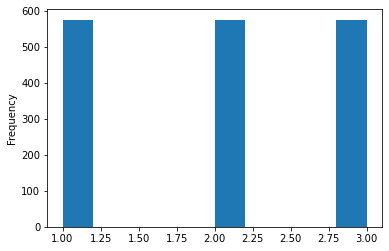

In [19]:
# Escreva seu código aqui
#df_carros['tamanho-porta-malas'].value_counts()

df_carros['tamanho-porta-malas'].plot.hist()

## 7. Existe alguma discrepância no atributo portas?

Dica: use um gráfico de caixa.

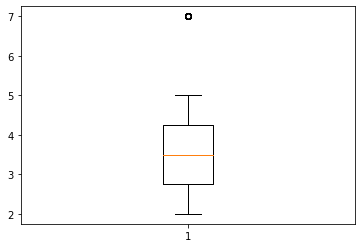

In [20]:
# Escreva seu código aqui

plt.boxplot(df_carros['portas'])
plt.show()

## 8. Analisando o alvo (target)

Que informações você consegue obter analisando o target?

In [21]:
# Escreva seu código aqui
df_carros['classe'].describe()

count         1728
unique           4
top       n_aceito
freq          1210
Name: classe, dtype: object

In [22]:
df_carros['classe'].value_counts()

n_aceito    1210
aceito       384
bom           69
m_bom         65
Name: classe, dtype: int64